# Module 2: introduction to Python
## Python Variables and Syntax

CSCI 1360: Foundations for Informatics and Analytics


## Overview and Objectives

In this lecture, we'll get into more detail on Python variables, as well as language syntax. By the end, you should be able to:

 - Define variables of string and numerical types, convert between them, and use them in basic operations
 - Explain the different variants of typing in programming languages, and what "duck-typing" in Python does
 - Understand how Python uses whitespace in its syntax
 - Demonstrate how smart variable-naming and proper use of comments can effectively document your code

## Part 1: Variables and Types

We saw in the last lecture how to define variables, as well as a few of the basic variable "types" available in Python--strings and numbers, mainly.

It's important to keep in mind that *each variable you define has a "type"*, and this type will dictate much (if not all) of the operations you can perform on and with that variable.

To recap: a *variable* in Python is a sort of placeholder that stores a value. Critically, a variable has both a *name* and a *type*. For example:

In [3]:
x = 2

float

It's easy to determine the name of the variable; in this case, the name is $x$. It can be a bit more complicated to determine the type of the variable, as it depends on the value the variable is storing. In this case, it's storing the number 2. Since there's no decimal point on the number, we call this number an *integer*, or *int* for short.

In sum: the name of our variable is `x` and the type is `int`.

### Numerical types

But what other types of variables are there, besides `int`?

In [2]:
y = 2.0

`y` is assigned a value of 2.0: the decimal point is the clear indicator that this variable is type *floating-point*, or *float* for short.

Floats do the heavy-lifting of much of the computation in data science. In general, you tend to use floats for heavy computation, and ints for counting things.

There is an explicit connection between ints and floats. Let's illustrate with an example:

In [5]:
x = 2
y = 3
z = x / y

In this case, we've defined two variables `x` and `y` and assigned them integer values, so they are both of type `int`. However, we've used them both in a division operation and assigned the result to a variable named `z`. If we were to check the type of `z`, what type do you think it would be?

In [6]:
type(z)

float

`z` is a float!

How does that happen? Shouldn't an operation involving two ints produce an int?

In general, yes it does. However, because there are cases where a decimal number is created, Python *implicitly* "promotes" the variable type from `int` to `float`.

This is known as **casting**, and it can take two forms: implicit casting (as we just saw), or explicit casting.

### Casting

Implicit casting tries to use "common sense": if you're dividing two numbers, you have a pretty good chance of getting a decimal back, so the quotient should probably be a float.

For something like multiplication, the type of the output depends on the types of the inputs--two numbers with decimals, when multiplied, will also produce a decimal number, while two `int`s multiplied will produce an `int`. No implicit casting needed there.

In [5]:
x = 2
y = 3
z = x * y
type(z)

int

In [6]:
x = 2.5
y = 3.5
z = x * y
type(z)

float

With explicit casting, however, it's *you the programmer* who are making explicit (hence the name) what type you want your variables to be.

Python has a couple special built-in functions for performing explicit casting on variables, and they're named what you would expect: `int()` for casting a variable as an int, and `float` for casting it as a float.

In [7]:
x = 2.5
y = 3.5
z = x * y

In [8]:
print(z)  # z is a float because x and y were floats

8.75


In [9]:
print(int(z))  # we've explicitly casted z to an int

8


Any idea what's happening here?

With explicit casting, you are telling Python to override its default behavior. In doing so, it has to make some decisions.

When you cast a `float` to an `int`, some information is lost: namely, the decimal or fraction portion. So the way Python handles this is by quite literally **discarding the entire decimal portion**.

In this way, even if your number was 9.999999999 and you perfomed an explicit cast to `int()`, Python would hand you back a 9.

Go ahead and try this on your own!

### Language typing mechanisms

Python is *dynamically typed*. This means you don't have to specify the type of the variable when you define it; rather, Python *automatically infers the type* based on how you've defined it and how you use it.

As we've already seen, Python creates a variable of type `int` when you assign it an integer number like 5, and it automatically converts the type to a `float` whenever the operations produce decimals.

Other languages, like C++ and Java, are *statically typed*, meaning in addition to naming a variable when it is declared, the programmer must also explicitly state the type of the variable.

Like with compiled vs interpreted languages, *dynamic typing* has its own pros and cons:

Pros:
 - Streamlined: just name the variable and go!
 - Flexible: use a variable as an int, then redefine it later as a float.

Cons:
 - Easier to make mistakes: is this variable an int or a float? And later on, did any operation "promote" it via implicit casting?
 - Potential for malicious bugs

To figure out what type a variable is, Python implements what is known as [duck typing](https://en.wikipedia.org/wiki/Duck_typing): if it walks like a duck and quacks like a duck, it's a duck.

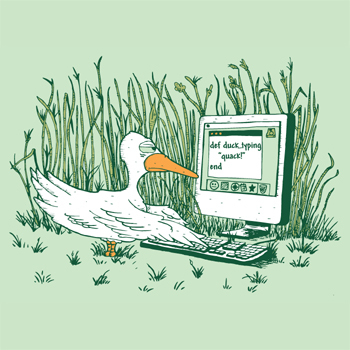

This brings us to a concept known as **type safety**. This is an important point, especially in dynamically typed languages: there are countless examples of nefarious hacking that has exploited dynamic typing.

A particularly fun example is known as a roundoff error, or more specifically to our case, a [representation error](https://en.wikipedia.org/wiki/Round-off_error#Representation_error). This occurs when we are attempting to represent a value for which we simply don't have enough precision to accurately store.

In short: you needed more numbers than you had available.

- When there are too many decimal values to represent (usually because the number we're trying to store is very, very small), we get an *underflow error*.

 - When there are too many whole numbers to represent (usually because the number we're trying to store is very, very large), we get an *overflow error*.

### Example of an underflow error

A signed byte can store 256 possible exponents, which are whole numbers that vary from -128 to 127. However, the number $$1 \times 10^{-129}$$ is an example of a value that we cannot store in that byte.

One of the most popular examples of an overflow error was the [Y2K bug](https://en.wikipedia.org/wiki/Year_2000_problem)!

- In this case, most Windows machines internally stored the year as simply the last two digits of the year. Thus, when the year 2000 rolled around, the two numbers representing the year "overflowed" and went from 99 to 00, which the computer interpreted as "1900".

 - A similar problem is [anticipated for 2038](https://en.wikipedia.org/wiki/Year_2038_problem), when 32-bit Unix machines will also see their internal date representations overflow to 0 and the computers will suddenly think it's January 1, 1970.

In these cases, and especially in dynamically typed languages like Python, it is *very important* to know what types of variables you're working with and what the limitations of those types are.

### String types

Strings, as we've also seen previously, are the variable types used in Python to represent text.

In [11]:
x = "this is a string"
type(x)

str

Unlike numerical types like ints and floats, you can't really perform arithmetic operations on strings, *with one exception*:

In [12]:
x = "some string"
y = "another string"
z = x + " " + y
print(z)

some string another string


The `+` operator, when applied to strings, is called *string concatenation*.

This means that it glues or *concatenates* two strings together to create a new string. In this case, we took the string in `x`, concatenated it to an empty space `" "`, and concatenated that again to the string in `y`, storing the whole thing in a final string `z`.

Other than the `+` operator, the other arithmetic operations aren't defined for strings, so I wouldn't recommend trying them...

In [13]:
s = "2"
t = "divisor"
x = s / t

TypeError: unsupported operand type(s) for /: 'str' and 'str'

`unsupported operand` quite literally means: the division operator cannot be used for strings. Sorry!

Casting, however, is alive and well with strings. In particular, if you know the string you're working with is a *string representation of a number*, you can cast it from a string to a numeric type:

In [ ]:
s = "2"  # Note the quotes--that means this is a STRING.
x = int(s)  # Now we've explicitly casted it as an int and stored it in x.

In [ ]:
print(s, type(s))  # s is still s!

In [ ]:
print(x, type(x))  # but now we also have x

We can do the same thing in reverse: take numbers and convert them to strings.

In [1]:
x = 2  # just a number, so x is ?
s = str(x)  # now we've explicit cast the value in x to a string

In [2]:
print(x, type(x))

2 <class 'int'>


In [3]:
print(s, type(s))

2 <class 'str'>


This is a powerful and often *necessary* ability when you're reading in, say, lots of data off of a website somewhere that you want to later analyze!

Strings also have some useful methods that numeric types don't for doing some basic text processing.

In [4]:
s = "Some string with WORDS"
print(s.upper())  # make all the letters uppercase

SOME STRING WITH WORDS


In [5]:
print(s.lower())  # make all the letters lowercase

some string with words


A very useful method that will come in handy later in the course when we do some text processing is `strip()`.

Often when you're reading text from a file and splitting it into tokens, you're left with strings that have leading or trailing whitespace:

In [6]:
s1 = " python "     # A few blank spaces before and after
s2 = "   python"    # A lot of blank spaces before
s3 = "python     "  # A lot of blank spaces after

Anyone who looked at these three strings would say they're the same--they all contain the same word, "python"--but the whitespace before and after the word `python` in each of them results in Python seeing them each as unique. Thankfully, we can use the `strip` method:

In [7]:
print("|" + s1.strip() + "|")
print("|" + s2.strip() + "|")
print("|" + s3.strip() + "|")

|python|
|python|
|python|


You can also delimit strings using *either* single-quotes or double-quotes. Either is fine and largely depends on your preference.

In [8]:
s = "some string"
t = 'this also works'

Python also has a built-in method `len()` that can be used to return the length of a string. The length is simply the number of individual characters (including any whitespace) in the string.

In [9]:
s = "some string"
len(s)

11

Go ahead and count the characters to convince yourself. Remember that whitespace is considered a character!

### Variable comparisons and Boolean types

We can also compare variables! By comparing variables, we can ask whether two things are equal, or greater than or less than some other value.

This sort of true-or-false comparison gives rise to yet another type in Python: the *boolean* type.

Where `int`s and `float`s and `string`s can take all kinds of values, a variable with a *boolean* type can only be one of two possible values: `True` or `False`.

Let's say we have two numeric variables, `x` and `y`, and want to check if they're equal. To do this, we use a variation of the assginment operator:

In [10]:
x = 2
y = 2
x == y

True

Hooray! The `==` sign is the equality comparison operator, and it will return `True` or `False` depending on whether or not the two values are exactly equal.

(**Critical to remember**: a single equal sign `=` is the *assignment* operator, for storing values in variables. The double equal sign `==` is the *equality comparison* operator, for testing if two variables are equal.)

This works for strings as well:

In [9]:
s1 = "a string"
s2 = "a string"
s1 == s2

True

In [10]:
s3 = "another string"
s1 == s3

False

We can also ask if variables are less than or greater than each other, using the `<` and `>` operators, respectively.

In [11]:
x = 1
y = 2
x < y  # 1 < 2? Yes!

True

In [12]:
x > y  # 1 > 2? No!

False

In a small twist of relative magnitude comparisons, we can also ask if something is less than *or equal to* or greater than *or equal to* some other value. To do this, in addition to the comparison operators `<` or `>`, we also add an equal sign:

In [13]:
x = 2
y = 3
x <= y  # is 2 less than or equal to 3? Yes!

True

In [14]:
x = 3
x <= y  # is 3 less than or equal to 3? Yes!

True

In [15]:
x = 3.00001
x <= y  # is 3.00001 less than or equal to 3? No!

False

Interestingly, these operators also work for strings. Be careful, though: their behavior may be somewhat unexpected until you figure out what actual trick is happening:

In [16]:
s1 = "some string"
s2 = "another string"
s1 > s2

True

In [17]:
s1 = "Some string"
s1 > s2

False

Any idea how the comparison is being done? If you don't, that's perfectly ok: the upshot is, it's [almost] always a bad idea to do this sort of comparison with strings.

## Part 2: Variable naming conventions and documentation

There are some rules regarding what can and cannot be used as a variable name.

### Variable naming rules

 - Names can contain only letters, numbers, and underscores.

All the letters a-z (upper and lowercase), the numbers 0-9, and underscores are at your disposal. Anything else is illegal. No special characters like pound signs, dollar signs, or percents are allowed.

 - Variable names can only *start* with letters or underscores.

Numbers cannot be the first character of a variable name. `message_1` is a perfectly valid variable name; however, `1_message` is not and will throw an error.

However, `_message1` is completely valid!

 - Spaces are not allowed in variable names.

Underscores are how Python programmers tend to "simulate" spaces in variable names, but simply put there's no way to name a variable with multiple words separated by spaces.

 - Avoid using Python keywords or function names as variables.

This might take some trial-and-error. Basically, if you try to name a variable `print` or `float` or `str`, your program will probably start behaving very strangely down the road.

*Technically* this isn't outlawed in Python--it's not a rule, but rather a guideline, and a very good one--but it will cause a lot of headaches later in your program.

### Variable naming conventions

These are not hard-and-fast rules, but rather suggestions to help "standardize" code and make it easier to read by people who aren't necessarily familiar with the code you've written.

 - Make variable names short, but descriptive.

I've been giving a lot of examples using variables named `x`, `s`, and so forth.

**This is bad.** Don't do it--unless, for example, you're defining `x` and `y` to be points in a 2D coordinate axis, or as a counter; one-letter variable names for counters are quite common.

Outside of those narrow use-cases, the variable names should constitute a pithy description that reflects their function in your program. A variable storing a name, for example, could be `name` or even `student_name`, but don't go as far as to use `the_name_of_the_student`.

 - Be careful with the lowercase `l` or uppercase `O` (that's "el" and "oh").

This is one of those annoying rules that largely only applies to one-letter variables: stay away from using letters that also bear striking resemblance to numbers. Naming your variable `l` or `O` may confuse downstream readers of your code, making them think you're sprinkling 1s and 0s throughout your code.

 - Variable names should be all lowercase, using underscores for multiple words.

Java programmers may take umbrage with this point: the convention there is to `useCamelCase` for multi-word variable names.

Since Python takes quite a bit from the C language (and its back-end is implemented in C), it also borrows a lot of C conventions, one of which is to use underscores and all lowercase letters in variable names. So rather than `multiWordVariable` as Java tends to do, Python does `multi_word_variable`.

The one exception to this rule is when you define variables that are *constant*; that is, their values don't change over your entire program. In this case, the variable name is usually in all-caps. For example: `PI = 3.14159`.

### Self-documenting code

The practice of pithy but precise variable naming strategies is known as "self-documenting code."

We've learned before that we can insert comments into our code to explain things that might otherwise be confusing:

In [18]:
# Begins by converting two strings to numbers (int and float).
# Adds these numbers together.
# Casts the sum to an integer.
# Stores their sum in the variable x.

num1 = "1345"
num2 = "31.5"

num_sum = int(num1) + float(num2)
x = int(num_sum)

print(x)

1376


Does your reading of the comments help clarify what the code is doing?

Comments are important to good coding style and should be used often for clarification.

However, even more preferable to the liberal use of comments is a good variable naming convention. For instance, instead of naming a variable "x" or "y" or "c", give it a name that describes its purpose.

In [19]:
str_length = len("some string")

I could have used a comment to explain how this variable was storing the length of the string, but by naming the variable itself in terms of what it was doing, I don't even need such a comment. It's self-evident from the name itself what this variable is doing. Hence, *self-documenting.*

## Part 3: Whitespace in Python

Whitespace is important in the Python language.

Some languages like C++ and Java use semi-colons to delineate the end of a single statement. Python, however, does not, but still needs some way to identify when we've reached the end of a statement.

In Python, it's the **return key** that denotes the end of a statement.

**Returns, tabs, and spaces** are all collectively known as "whitespace", and each can drastically change how your Python program runs. Especially when we get into loops, conditionals, and functions, this will become critical and may be the source of many insidious bugs.

For example, the following code won't run:

In [20]:
x = 5
  x += 10

IndentationError: unexpected indent (2487189790.py, line 2)

Python sees the indentation--it's important to Python in terms of delineating blocks of code. But in this case Python can't figure out why the code is indented, so it throws an error.

Can you fix this code so it does run correctly?

This can be particularly pernicious when writing longer Python programs, full of functions and loops and conditionals, where the indentation of your code is constantly changing. For this reason, I am giving you the following mandate:

**DO NOT MIX TABS AND SPACES!!!**

If you're indenting your code using 2 spaces, *ALWAYS USE SPACES.*

If you're indenting your code using 4 spaces, *ALWAYS USE SPACES.*

If you're indenting your code with a single tab, *ALWAYS USE TABS.*

Mixing the two in the same file will cause **ALL THE HEADACHES**. Your code will crash but will be coy as to the reason why.

## Review Questions

Some questions to discuss and consider. **Work with a classmate**

1: Multiply 2.1 and 3.1 in Python. What do you get? Why?

2: Let's say you want to count the words in the English Wikipedia. What type of variable would we use to store that count, and why?

3: What does `len()` return for `s = "string"`? How about `s = " string "`? How about `s = " string ".strip()`?

4: Give an example of a variable name that is used to store the average area of a group of squares. What type would this variable be?

5: I'm opening up my favorite text editor to write a Python script. Should I configure it to use tabs or spaces?

## Additional Resources

 1. Matthes, Eric. *Python Crash Course*. 2016. ISBN-13: 978-1593276034
 2. Grus, Joel. *Data Science from Scratch*. 2015. ISBN-13: 978-1491901427
 